In [265]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [266]:
eyes_cascade = cv2.CascadeClassifier("frontalEyes35x16.xml")
nose_cascade = cv2.CascadeClassifier("Nose18x15.xml")

In [267]:
eyes_cascade

<CascadeClassifier 00000235964C7310>

In [268]:
spec_img = cv2.imread("glasses.png")
mus_img =  cv2.imread("mustache.png")

(485, 377, 3)
(485, 377, 3)


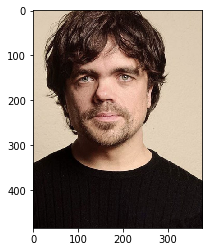

In [269]:
frame  = cv2.imread("Before.png")
print(frame.shape)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame)
print(frame.shape)

In [270]:
eyes  = eyes_cascade.detectMultiScale(frame,1.1,5)
nose  = nose_cascade.detectMultiScale(frame,1.1,5)

In [271]:
print(eyes)

[[ 80 111  75 165]]


In [272]:
print(nose)

[[126 170  47  56]]


In [273]:
spec_img=cv2.imread('glasses.png',cv2.IMREAD_UNCHANGED)#If set, return the loaded image as is (with alpha channel, otherwise it gets cropped). 
spec_img = cv2.cvtColor(spec_img,cv2.COLOR_BGR2BGRA)
print(spec_img)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


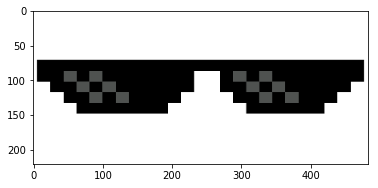

In [274]:
plt.imshow(spec_img)

In [275]:
must_img=cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
must_img=cv2.cvtColor(must_img,cv2.COLOR_BGR2RGBA)

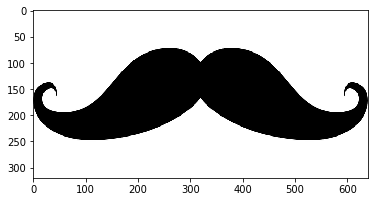

In [276]:
plt.imshow(must_img)

In [277]:
#Do remember detectMultiScale will give list of list.
eyes=eyes[0]
print(eyes)

[ 80 111  75 165]


In [278]:
nose=nose[0]
print(nose)

[126 170  47  56]


In [279]:
spec_img=cv2.resize(spec_img,(eyes[3],eyes[2]))

(75, 165, 4)


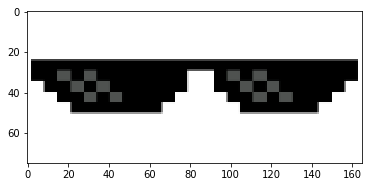

In [280]:
plt.imshow(spec_img)
print(spec_img.shape)

In [281]:
x,y,w,h=eyes
#Overwritting pixels:-
for i in range(spec_img.shape[0]):
    for j in range(spec_img.shape[1]):
            if(spec_img[i,j,3]>0):#opacity for white color is 0. 
                frame[y+i,x+j,:]=spec_img[i,j,:-1]

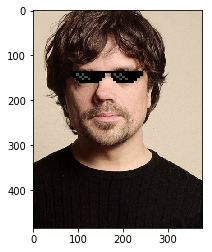

In [282]:
plt.imshow(frame)#Always load image with cv2.IMREAD_UNCHANGED if image's transparency is checked.

In [283]:
must_img=cv2.resize(must_img,(nose[3],nose[2]))

(47, 56, 4)


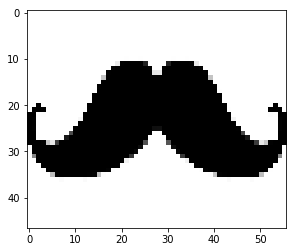

In [284]:
plt.imshow(must_img)
print(must_img.shape)

In [285]:
x,y,w,h=nose
x+=5
y+=25
#Overwritting pixels:-
for i in range(must_img.shape[0]):
    for j in range(must_img.shape[1]):
        if(must_img[i,j,3]>0):
            frame[y+i,x+j,:]=must_img[i,j,:-1]

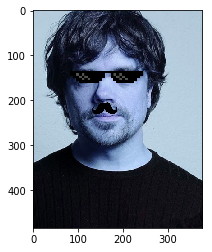

In [286]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.imshow(frame)

In [287]:
print(frame)

[[[180 202 219]
  [181 203 220]
  [180 202 219]
  ...
  [175 197 215]
  [174 199 216]
  [173 199 214]]

 [[180 202 219]
  [181 203 220]
  [180 202 219]
  ...
  [176 198 215]
  [175 199 216]
  [173 199 214]]

 [[180 202 219]
  [181 203 220]
  [180 202 219]
  ...
  [176 198 215]
  [175 199 216]
  [173 199 214]]

 ...

 [[  1   2   6]
  [  0   1   5]
  [  1   2   6]
  ...
  [ 21  21  27]
  [ 20  20  26]
  [ 10  10  17]]

 [[  2   3   7]
  [  1   2   6]
  [  0   1   5]
  ...
  [ 16  16  22]
  [ 15  15  21]
  [ 16  16  22]]

 [[  2   3   7]
  [  0   1   5]
  [  0   1   5]
  ...
  [ 13  13  19]
  [ 15  15  21]
  [ 15  15  22]]]


In [288]:
print(frame.shape)

(485, 377, 3)


In [289]:
frame=frame.reshape((-1,3))

In [290]:
print(frame.shape)

(182845, 3)


In [291]:
print(type(frame))

<class 'numpy.ndarray'>


In [292]:
print(frame)

[[180 202 219]
 [181 203 220]
 [180 202 219]
 ...
 [ 13  13  19]
 [ 15  15  21]
 [ 15  15  22]]


In [293]:
df=pd.DataFrame(frame,columns=['Channel 1',"Channel 2","Channel 3"]).to_csv("Solution.csv",index=False)

In [294]:
print(df)

None
